<a href="https://colab.research.google.com/github/ayaramis/DataScience/blob/main/Capstone_Project_5_Student_(Hand_Written_Digits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:10px 10px;"><b>Hand Written Digits</b></p>

# Hand Written Digits Project

Data reference link : https://datahub.io/machine-learning/pendigits#readme

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


# Exploratory Data Analysis and Visualization

In [116]:
df = pd.read_csv('pendigits_txt.csv')

In [117]:
df.sample(15)

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
31,40,99,51,66,79,26,39,0,0,27,8,77,46,100,100,94,5
4763,60,63,100,84,55,100,0,78,40,68,98,60,73,28,32,0,9
6864,60,82,71,100,100,87,73,60,100,36,79,8,37,0,0,17,3
6272,0,37,17,0,66,1,100,31,96,71,59,100,12,98,9,59,0
1100,16,100,10,59,57,35,27,0,0,29,2,86,45,96,100,96,5
1478,40,98,51,100,0,61,11,16,93,0,100,37,18,51,24,19,6
542,0,78,39,100,82,75,68,37,54,0,6,25,35,37,100,37,7
4550,21,81,0,55,7,10,56,0,97,26,100,71,62,100,15,84,0
4493,33,77,0,60,75,69,78,26,12,0,15,46,23,93,100,100,5
2482,7,78,33,96,89,100,100,80,64,60,74,36,46,14,0,0,3


In [118]:
df.shape

(10992, 17)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [121]:
df['class'].value_counts()

class
2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: count, dtype: int64

In [122]:
for i in df.columns:
  print('======'+i+'======')
  print(df.groupby('class')[i].sum())

======input1======
class
0    40431
1    16805
2    21041
3    26148
4    49144
5    43508
6    92422
7     3994
8    60081
9    73073
Name: input1, dtype: int64
======input2======
class
0     98371
1     70172
2     88030
3     88684
4    113874
5     95945
6    104248
7    103932
8     86595
9     85791
Name: input2, dtype: int64
======input3======
class
0    13233
1    50694
2    48197
3    59776
4    25312
5    44941
6    54652
7    51814
8    42021
9    55697
Name: input3, dtype: int64
======input4======
class
0     66649
1     89080
2    113699
3    104993
4     90809
5     80002
6     91581
7    112200
8     83994
9     87839
Name: input4, dtype: int64
======input5======
class
0    17071
1    79847
2    77175
3    91410
4     6581
5    60466
6    21869
7    90043
8    54664
9    47950
Name: input5, dtype: int64
======input6======
class
0     22403
1    102309
2     91247
3     89345
4     58525
5     62434
6     61758
7     92226
8     54784
9     85749
Name: input6, dtype: int6

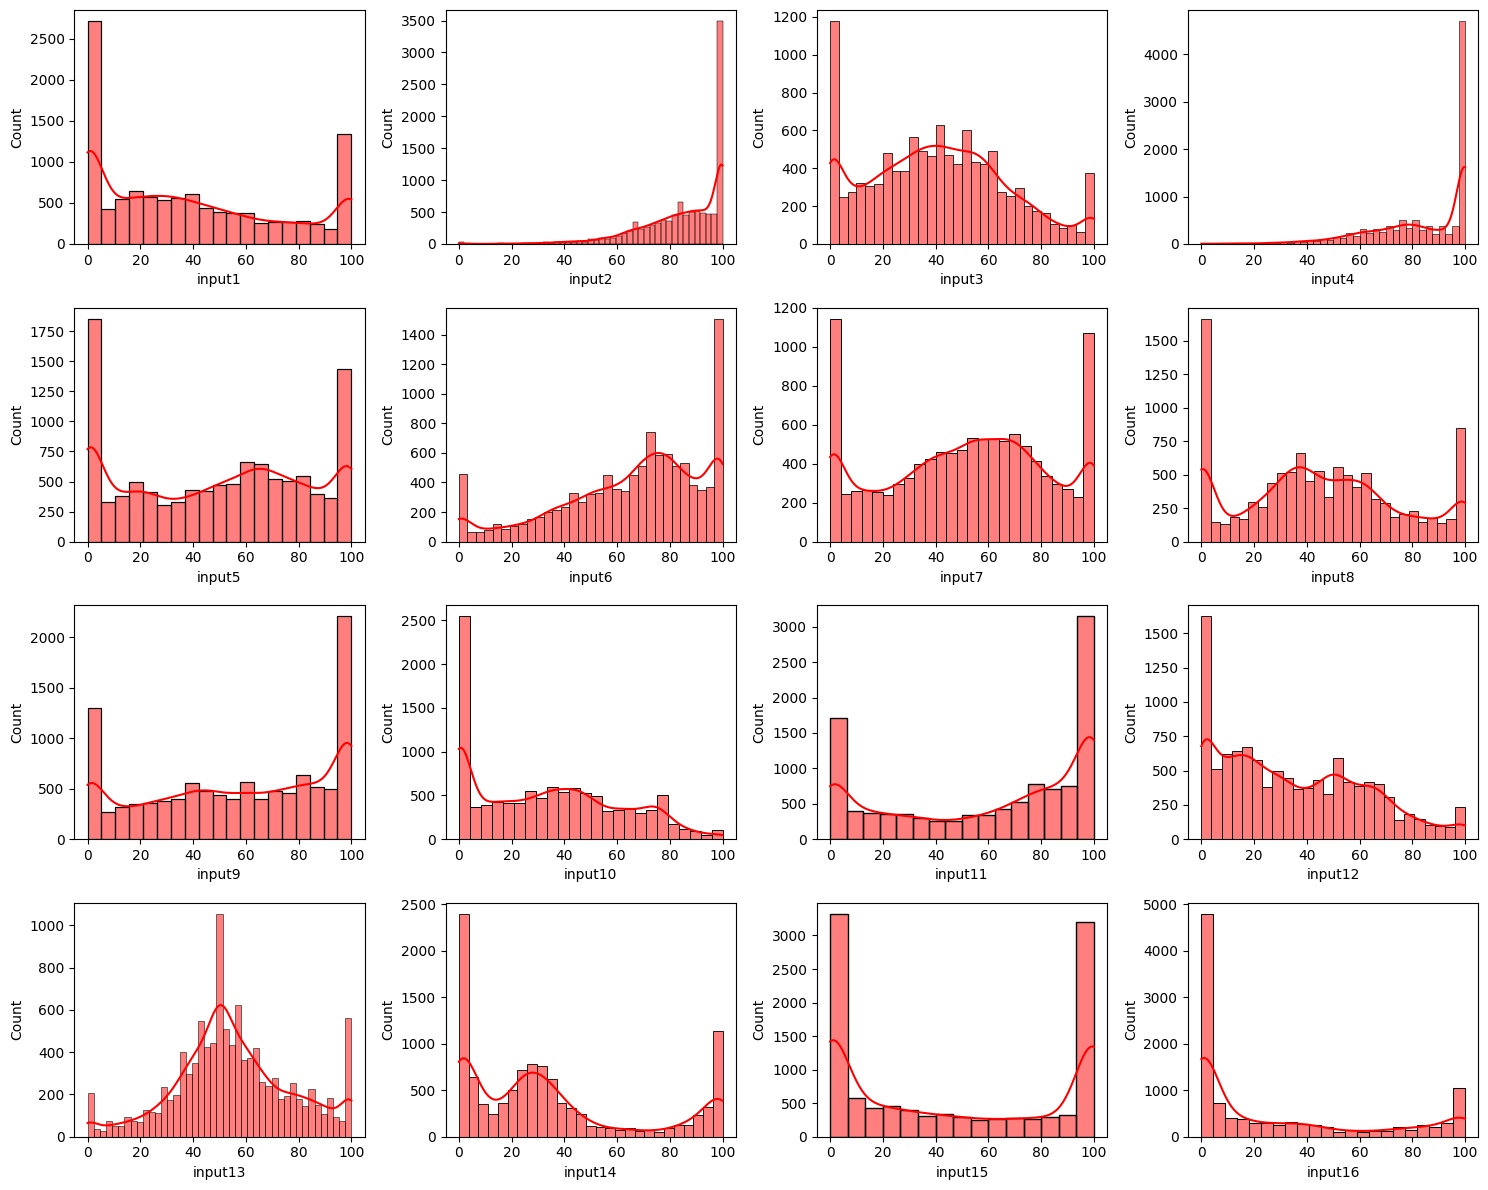

In [123]:
cols= list(df.columns)
fig, ax = plt.subplots(4,4,figsize=(15,12))
ind= 0
for i in range(4):
    for j in range(4):
        sns.histplot(df[cols[ind]], ax=ax[i,j], color = "red", kde=True)
        ind+=1
plt.tight_layout()
plt.show()

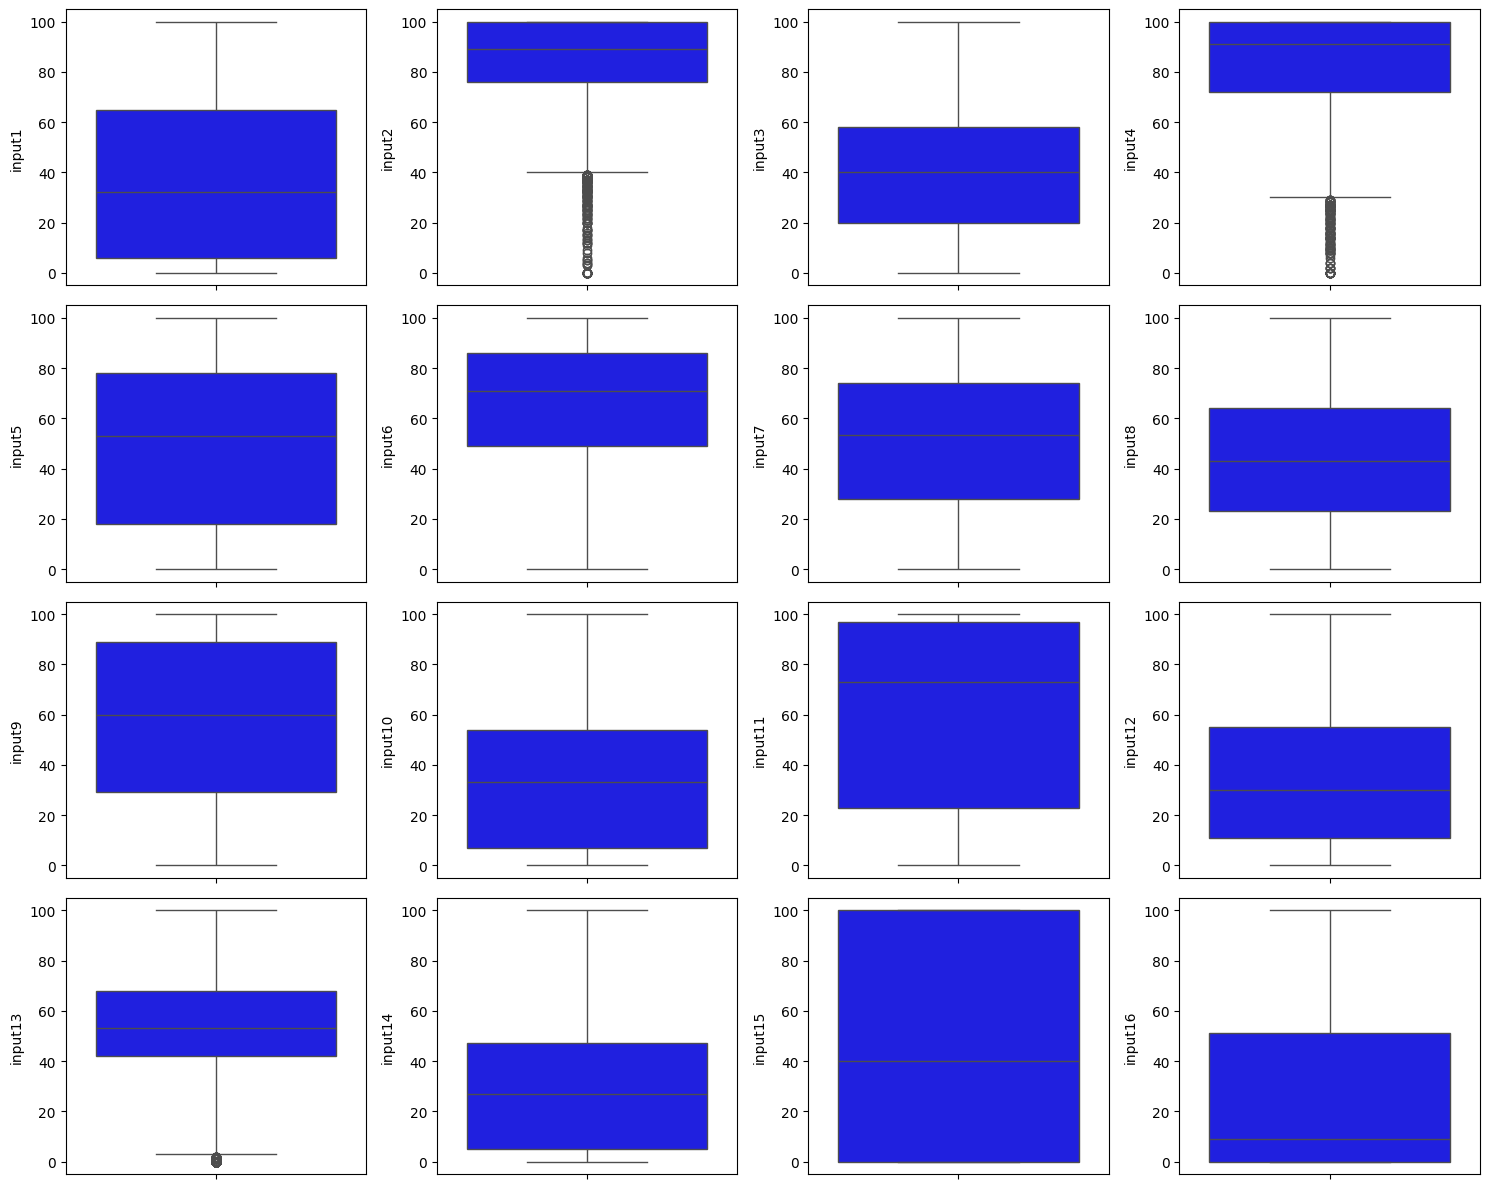

In [124]:
cols= list(df.columns)
fig, ax = plt.subplots(4,4,figsize=(15,12))
ind= 0
for i in range(4):
    for j in range(4):
        sns.boxplot(df[cols[ind]], ax=ax[i,j], color = "blue")
        ind+=1
plt.tight_layout()
plt.show()

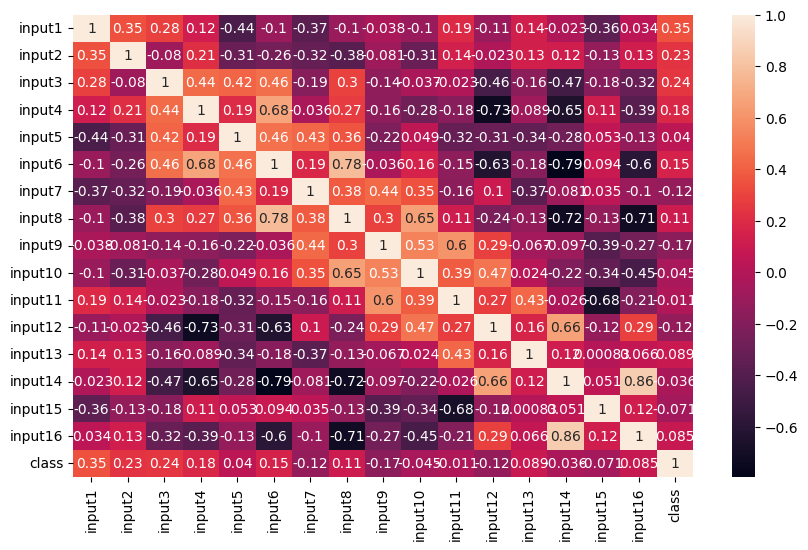

In [125]:
sns.heatmap(df.corr(), annot=True);

# Determination of Dependent and Independent Variable

In [126]:
X = df.drop(columns='class')
y = df['class']

In [127]:
print(X)
print(y)

       input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0          47     100      27      81      57      37      26       0       0   
1           0      89      27     100      42      75      29      45      15   
2           0      57      31      68      72      90     100     100      76   
3           0     100       7      92       5      68      19      45      86   
4           0      67      49      83     100     100      81      80      60   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
10987      36     100      24      70       0      38      49      33      95   
10988      16      75      41     100      52      64      32      27       0   
10989      56     100      27      79       0      39      12       0      66   
10990      19     100       0      61       3      23      48       0      97   
10991      38     100      37      81      12      55       0      28      52   

       input10  input11  in

# Train Test Split

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

In [129]:
print(X.shape, X_train.shape, X_test.shape)

(10992, 16) (9892, 16) (1100, 16)


# Support Vector Machine (SVM) Classifier

In [130]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV

In [131]:
operations = [('Scaler', MinMaxScaler()), ('svc', SVC(random_state=1, kernel='linear'))]
svc_pipe = Pipeline(steps=operations)

In [132]:
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('svc', SVC(kernel='linear', random_state=1))])

In [133]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [134]:
eval_metric(svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[107   0   0   0   1   0   2   0   4   0]
 [  0 112   2   0   0   0   0   0   0   0]
 [  0   1 113   0   0   0   0   0   0   0]
 [  0   0   0 105   0   0   0   1   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   1   0 102   0   0   2   1]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   1   0   1   0   0   0 112   0   0]
 [  3   0   0   0   0   1   0   0 102   0]
 [  1   2   0   0   0   1   0   0   0 102]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.97      0.98      0.97       114
           2       0.98      0.99      0.99       114
           3       0.98      0.99      0.99       106
           4       0.99      1.00      1.00       114
           5       0.98      0.96      0.97       106
           6       0.98      1.00      0.99       106
           7       0.99      0.98      0.99       114
           8       0.94      0.96      0.95       106
           9       

## Cross Validation for SVC

In [135]:
#svc = SVC(random_state=1)
scores = cross_validate(svc_pipe,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.980287
train_accuracy           0.982107
test_recall_macro        0.980279
train_recall_macro       0.982111
test_precision_macro     0.980319
train_precision_macro    0.982006
test_f1_macro            0.980210
train_f1_macro           0.982046
dtype: float64

## GridSearchCV for SVC

In [136]:
svc = SVC(random_state=1)
param_grid = {"C": [0.001, 0.05, 0.01, 0.1, 1.0],
             "kernel": ["rbf", "linear"],
             "gamma": ["scale", "auto", 0.2, 0.3]}

svc_grid = GridSearchCV(estimator=svc, param_grid = param_grid, scoring = "f1_macro", return_train_score=True, n_jobs=-1)

In [137]:
svc_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.05, 0.01, 0.1, 1.0],
                         'gamma': ['scale', 'auto', 0.2, 0.3],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1_macro')

In [138]:
eval_metric(svc_grid, X_train, y_train, X_test, y_test)

Test_Set
[[113   0   0   0   0   0   1   0   0   0]
 [  0 111   2   0   0   0   0   0   0   1]
 [  0   1 113   0   0   0   0   0   0   0]
 [  0   0   1 105   0   0   0   0   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   1   0 105   0   0   0   0]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   0   0   0 114   0   0]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   0   0   0   0   0   0   1   0 105]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      0.97      0.98       114
           2       0.97      0.99      0.98       114
           3       0.99      0.99      0.99       106
           4       1.00      1.00      1.00       114
           5       1.00      0.99      1.00       106
           6       0.99      1.00      1.00       106
           7       0.99      1.00      1.00       114
           8       1.00      1.00      1.00       106
           9       

In [139]:
svc_grid.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [207]:
operations = [('Scaler', MinMaxScaler()), ('svc', SVC(random_state=1, C= 1.0, gamma = 'scale', kernel = 'rbf'))]
svc = Pipeline(steps=operations).fit(X_train, y_train)

In [208]:
eval_metric(svc, X_train, y_train, X_test, y_test)

Test_Set
[[113   0   0   0   0   0   1   0   0   0]
 [  0 111   2   0   0   0   0   0   0   1]
 [  0   1 113   0   0   0   0   0   0   0]
 [  0   0   1 105   0   0   0   0   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   1   0 105   0   0   0   0]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   0   0   0 114   0   0]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   0   0   0   0   0   0   1   0 105]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.99      0.97      0.98       114
           2       0.97      0.99      0.98       114
           3       0.99      0.99      0.99       106
           4       1.00      1.00      1.00       114
           5       1.00      0.99      1.00       106
           6       0.99      1.00      1.00       106
           7       0.99      1.00      1.00       114
           8       1.00      1.00      1.00       106
           9       

In [142]:
svc_grid.best_score_

0.9937573605699486

# Decision Tree (DT) Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dt = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [145]:
eval_metric(dt, X_train, y_train, X_test, y_test)

Test_Set
[[111   0   0   0   3   0   0   0   0   0]
 [  0 106   3   1   1   0   0   3   0   0]
 [  0   2 111   0   0   0   0   0   0   1]
 [  0   1   1 101   0   1   0   1   0   1]
 [  0   0   2   0 111   0   0   0   0   1]
 [  0   1   0   1   0 103   0   0   0   1]
 [  2   0   0   0   0   1 102   0   0   1]
 [  0   0   1   1   0   0   0 109   1   2]
 [  0   0   0   0   0   1   1   3 101   0]
 [  0   0   0   2   2   2   0   1   0  99]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.96      0.93      0.95       114
           2       0.94      0.97      0.96       114
           3       0.95      0.95      0.95       106
           4       0.95      0.97      0.96       114
           5       0.95      0.97      0.96       106
           6       0.99      0.96      0.98       106
           7       0.93      0.96      0.94       114
           8       0.99      0.95      0.97       106
           9       

## Cross Validation for DT

In [146]:
dt = DecisionTreeClassifier(random_state=1)
scores = cross_validate(dt,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.963405
train_accuracy           1.000000
test_recall_macro        0.963401
train_recall_macro       1.000000
test_precision_macro     0.963919
train_precision_macro    1.000000
test_f1_macro            0.963452
train_f1_macro           1.000000
dtype: float64

## GridSearchCV for DT

In [147]:
dt = DecisionTreeClassifier(random_state=1)
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4,5,6, 7],
              "max_depth": [None, 2, 3, 4],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

dt_grid = GridSearchCV(estimator=dt, param_grid = param_grid, cv=10, scoring = "f1_macro", return_train_score=True, n_jobs=-1)

In [148]:
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_macro')

In [149]:
eval_metric(dt_grid, X_train, y_train, X_test, y_test)

Test_Set
[[111   0   0   0   3   0   0   0   0   0]
 [  0 106   3   1   1   0   0   3   0   0]
 [  0   2 111   0   0   0   0   0   0   1]
 [  0   1   1 101   0   1   0   1   0   1]
 [  0   0   2   0 111   0   0   0   0   1]
 [  0   1   0   1   0 103   0   0   0   1]
 [  2   0   0   0   0   1 102   0   0   1]
 [  0   0   1   1   0   0   0 109   1   2]
 [  0   0   0   0   0   1   1   3 101   0]
 [  0   0   0   2   2   2   0   1   0  99]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.96      0.93      0.95       114
           2       0.94      0.97      0.96       114
           3       0.95      0.95      0.95       106
           4       0.95      0.97      0.96       114
           5       0.95      0.97      0.96       106
           6       0.99      0.96      0.98       106
           7       0.93      0.96      0.94       114
           8       0.99      0.95      0.97       106
           9       

In [150]:
dt_grid.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [151]:
dt_grid.best_score_

0.9634521673814083

In [161]:
dt = DecisionTreeClassifier(max_depth = None,
                            max_features = None,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            splitter = 'best',
                            random_state=1).fit(X_train, y_train)

In [162]:
eval_metric(dt, X_train, y_train, X_test, y_test)

Test_Set
[[111   0   0   0   3   0   0   0   0   0]
 [  0 106   3   1   1   0   0   3   0   0]
 [  0   2 111   0   0   0   0   0   0   1]
 [  0   1   1 101   0   1   0   1   0   1]
 [  0   0   2   0 111   0   0   0   0   1]
 [  0   1   0   1   0 103   0   0   0   1]
 [  2   0   0   0   0   1 102   0   0   1]
 [  0   0   1   1   0   0   0 109   1   2]
 [  0   0   0   0   0   1   1   3 101   0]
 [  0   0   0   2   2   2   0   1   0  99]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.96      0.93      0.95       114
           2       0.94      0.97      0.96       114
           3       0.95      0.95      0.95       106
           4       0.95      0.97      0.96       114
           5       0.95      0.97      0.96       106
           6       0.99      0.96      0.98       106
           7       0.93      0.96      0.94       114
           8       0.99      0.95      0.97       106
           9       

## Feature Importance

In [176]:
model = DecisionTreeClassifier(max_depth = None,
                            max_features = None,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            splitter = 'best',
                            random_state=1)
model.fit(X_train, y_train)
model.feature_importances_
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['dt_importance'])
dt_imp_feats = feats.sort_values("dt_importance", ascending = False)
dt_imp_feats

,dt_importance
input14,0.114693
input10,0.114634
input16,0.094701
input5,0.088769
input9,0.087894
input15,0.083661
input11,0.083292
input1,0.068582
input4,0.063066
input2,0.061309


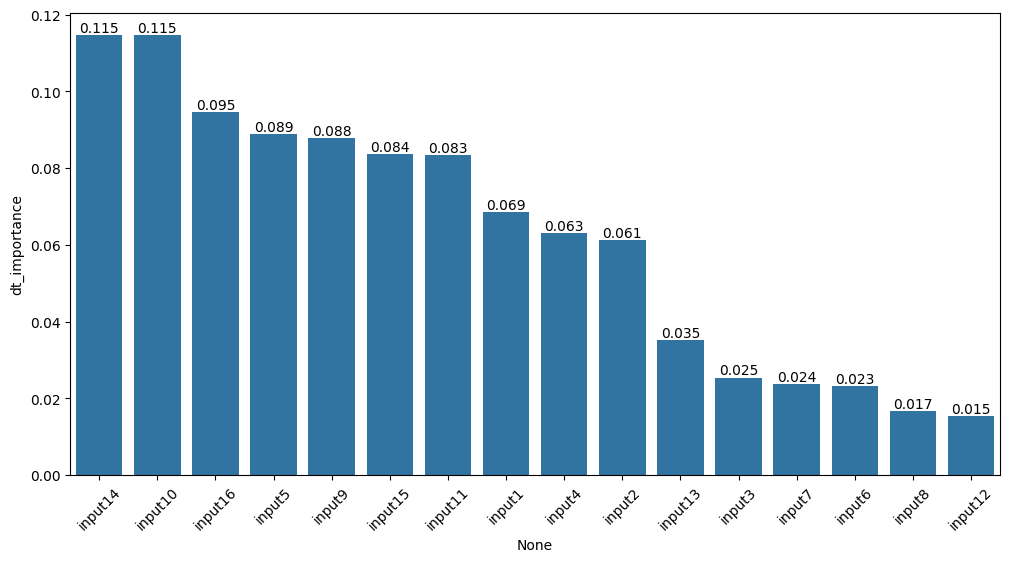

In [178]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dt_imp_feats, x=dt_imp_feats.index, y='dt_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=45);

# Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)

In [154]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[112   0   0   0   2   0   0   0   0   0]
 [  0 111   3   0   0   0   0   0   0   0]
 [  0   0 114   0   0   0   0   0   0   0]
 [  0   0   0 104   0   0   0   2   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   1   0 105   0   0   0   0]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   0   0   0   0   0   0 113   0   1]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   1   0   0   0   0   0   0   0 105]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.99      0.97      0.98       114
           2       0.97      1.00      0.99       114
           3       0.99      0.98      0.99       106
           4       0.98      1.00      0.99       114
           5       1.00      0.99      1.00       106
           6       1.00      1.00      1.00       106
           7       0.98      0.99      0.99       114
           8       1.00      1.00      1.00       106
           9       

## Cross Validation for RF

In [155]:
rf = RandomForestClassifier(random_state=1)
scores = cross_validate(rf,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.992418
train_accuracy           1.000000
test_recall_macro        0.992527
train_recall_macro       1.000000
test_precision_macro     0.992615
train_precision_macro    1.000000
test_f1_macro            0.992524
train_f1_macro           1.000000
dtype: float64

## GridSearchCV for RF

In [218]:
rf = RandomForestClassifier(random_state=1)
param_grid = param_grid = {'n_estimators':[200, 400, 800],
             'max_features':[1, 2],
             'max_depth':[4, 6],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [1, 2],
             'max_samples':[0.8, 1]}

rf_grid = GridSearchCV(estimator=rf, param_grid = param_grid, cv=10, scoring = "f1_macro", return_train_score=True, n_jobs=-1)

first parameters
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.8, 1]}

In [219]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6], 'max_features': [1, 2],
                         'max_samples': [0.8, 1], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 400, 800]},
             return_train_score=True, scoring='f1_macro')

In [220]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=6, max_features=2, max_samples=0.8,
                       min_samples_split=4, n_estimators=800, random_state=1)

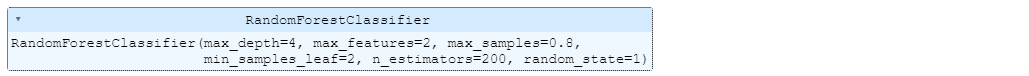

In [221]:
rf_grid.best_params_

{'max_depth': 6,
 'max_features': 2,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 800}

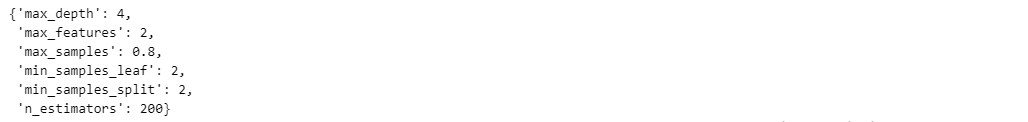

In [222]:
rf = RandomForestClassifier(max_depth=6, max_features=2, max_samples=0.8,
                       min_samples_split=4, n_estimators=800, random_state=1).fit(X_train, y_train)

In [223]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[111   0   0   0   2   0   0   0   0   1]
 [  0  91  19   3   0   0   0   0   0   1]
 [  0   3 110   1   0   0   0   0   0   0]
 [  0   1   0 103   0   0   0   1   0   1]
 [  0   0   0   0 113   0   1   0   0   0]
 [  0   0   0   3   0  97   0   0   0   6]
 [  0   0   0   0   0   0 106   0   0   0]
 [  0   4   0   0   0   0   0 107   1   2]
 [  1   0   0   0   0   0   0   3 101   1]
 [  0   1   0   0   0   0   0   0   0 105]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       114
           1       0.91      0.80      0.85       114
           2       0.85      0.96      0.91       114
           3       0.94      0.97      0.95       106
           4       0.98      0.99      0.99       114
           5       1.00      0.92      0.96       106
           6       0.99      1.00      1.00       106
           7       0.96      0.94      0.95       114
           8       0.99      0.95      0.97       106
           9       

## Feature Importance

In [216]:
model = RandomForestClassifier(max_depth=4, max_features=2, max_samples=0.8,
                       min_samples_leaf=2, n_estimators=200, random_state=1)
model.fit(X_train, y_train)
model.feature_importances_
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['rf_importance'])
rf_imp_feats = feats.sort_values("rf_importance", ascending = False)
rf_imp_feats

,rf_importance
input16,0.113686
input14,0.109884
input11,0.074242
input5,0.071211
input10,0.071039
input8,0.070997
input15,0.070225
input6,0.068558
input12,0.064830
input9,0.059065


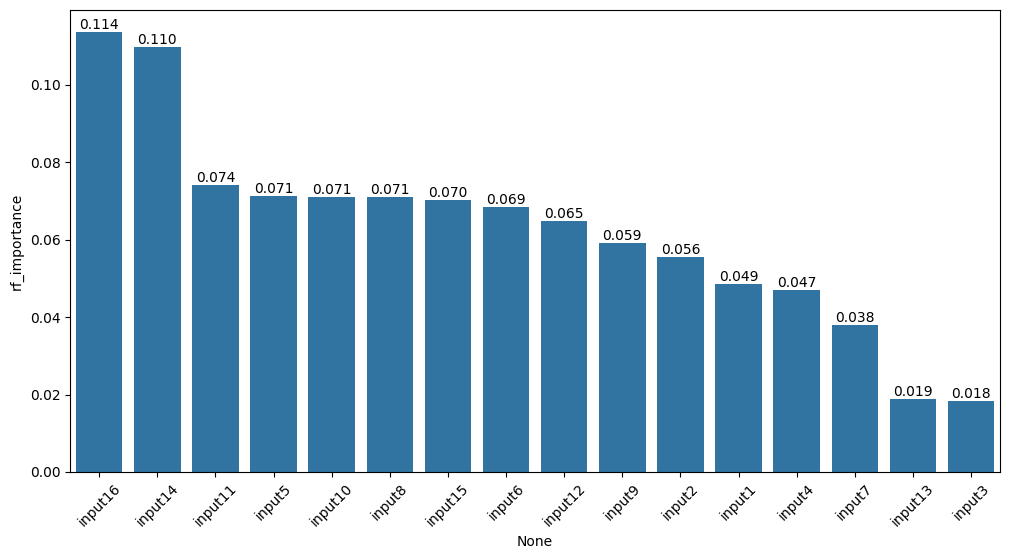

In [217]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rf_imp_feats, x=rf_imp_feats.index, y='rf_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=45);

# Choose the Best Model